## **Problem statement:** **To predict the medical insurance cost based on given parameters.**

*IMPORTING REQUIRED* *LIBRARIES*

In [ ]:
import os
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')

*Reading the data into a Dataframe.*

In [ ]:
data=pd.read_csv("/content/Medical_insurance_data.csv")

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830
1334,18,female,31.920,0.0,no,northeast,2205.98080
1335,18,female,36.850,0.0,no,southeast,1629.83350
1336,21,female,25.800,0.0,no,southwest,2007.94500


*Taking a deep copy of the data so as to not modify the original data*

In [ ]:
data1 = data.copy(deep = True)

*Display the first 5 and last 5 rows of the dataframe*

In [ ]:
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


In [ ]:
data1.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3.0,no,northwest,10600.5483
1334,18,female,31.92,0.0,no,northeast,2205.9808
1335,18,female,36.85,0.0,no,southeast,1629.8335
1336,21,female,25.80,0.0,no,southwest,2007.9450
1337,61,female,29.07,0.0,yes,northwest,29141.3603


*Display the Index of the Dataframe*

In [ ]:
data1.index

RangeIndex(start=0, stop=1338, step=1)

*Get statistics of the dataframe i.e. mean, median, mode, correlation, variance, standard deviation and more*

In [ ]:
data1.mean(numeric_only = True)

age            39.207025
bmi            30.659958
children        1.093252
charges     13270.422265
dtype: float64

In [ ]:
data1.median(numeric_only =True)

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [ ]:
data1.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0.0,no,southeast,1639.5631


In [ ]:
data1.std(numeric_only = True)

age            14.044333
sex             0.500163
bmi             6.081878
children        1.207523
smoker          0.403806
region          1.130643
charges     12110.359656
dtype: float64

In [ ]:
data1.var(numeric_only = True)

age         1.972433e+02
sex         2.501635e-01
bmi         3.698924e+01
children    1.458112e+00
smoker      1.630594e-01
region      1.278354e+00
charges     1.466608e+08
dtype: float64

In [ ]:
data1.skew(numeric_only = True)

age         0.054781
sex         0.019469
bmi         0.279155
children    0.943666
smoker     -1.463601
region      0.052334
charges     1.515391
dtype: float64

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1318 non-null   float64
 3   children  1319 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1324 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [ ]:
data1.describe()

,age,bmi,children,charges
count,1338.000000,1318.000000,1319.000000,1338.000000
mean,39.207025,30.659958,1.093252,13270.422265
std,14.049960,6.079569,1.207441,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.656250,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


*Get information of null values*

In [ ]:
data1.isnull().sum().to_dict()

{'age': 0,
 'sex': 0,
 'bmi': 20,
 'children': 19,
 'smoker': 0,
 'region': 14,
 'charges': 0}

In [ ]:
data1.isnull().sum().sum()

53

*Separating dataframe into numerical and categorical columns for Visualization*

In [ ]:
num = data1.select_dtypes(include = 'number')
cat = data1.select_dtypes(include = 'object')

*Fins out the outliers of numerical features using Boxplot. We can see that most of the numerical features contain outliers and hence their distribution should to be skewed.*

*Boxplot also helps us in understanding the distribution of the features along with uncovering statistical measures. For example the lowermost line is the minimum percentile, the baseline of the box is 25th percentile, the middle line is the 50 percentile(or median), the uppermost line of the box is 75th percentile and the topmost line is the maximum percentile. *

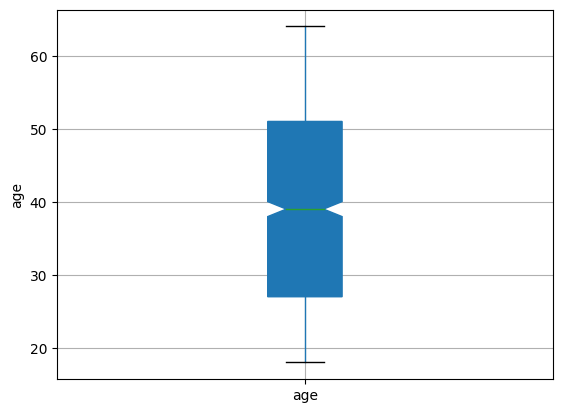

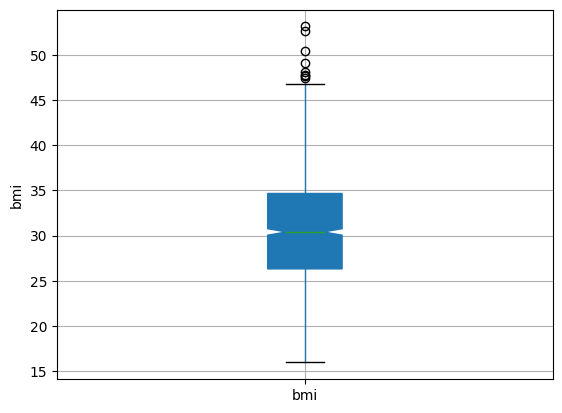

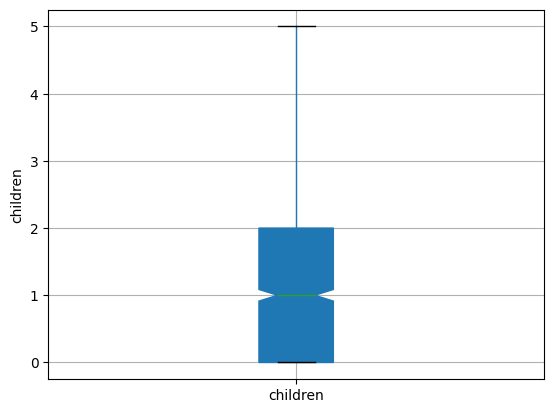

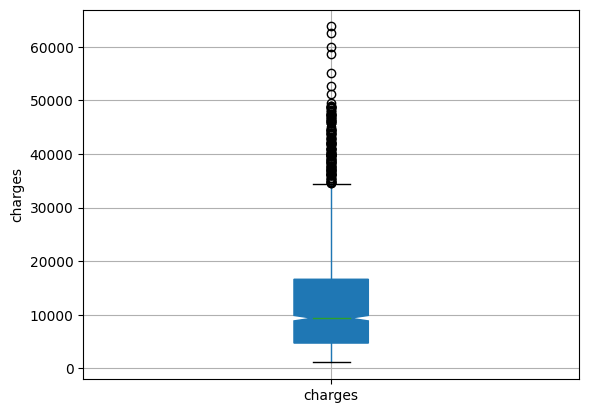

In [ ]:
for i in num:
    num.boxplot(column = i, patch_artist = True, notch ='True')
    plt.ylabel(i)
    plt.show()

*Check the distribution of numerical features using distplot. This helps in checking the skewness of numerical features.*

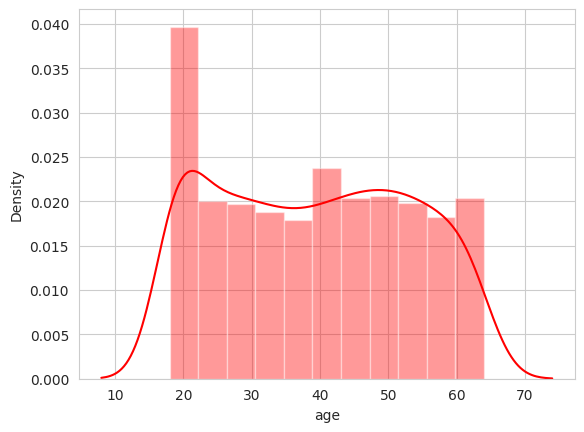

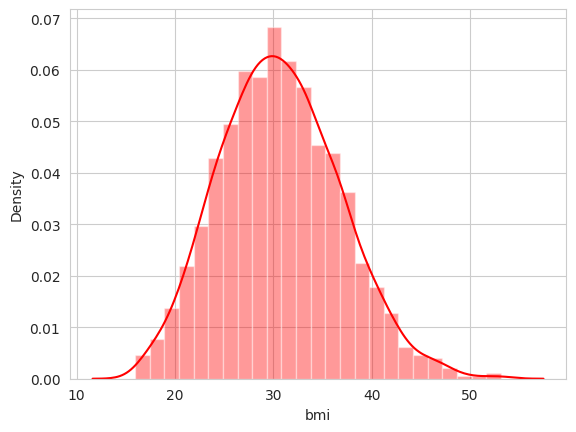

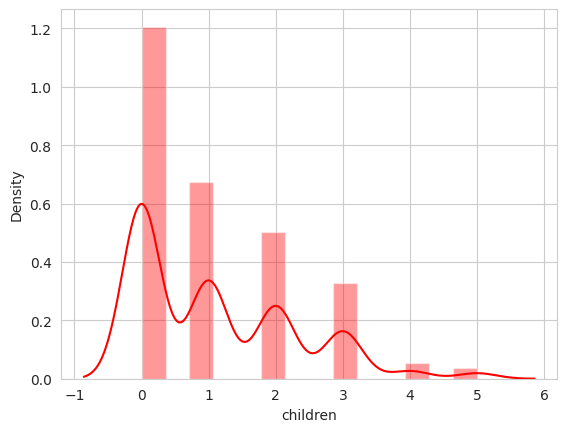

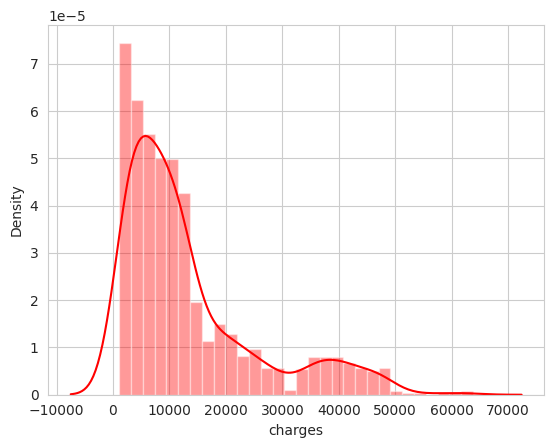

In [ ]:
sns.set_style('whitegrid')
for j in num:
    sns.distplot(data1[j], kde = True, color = 'red')
    plt.show()

*Countplot to get the frequency of various classes of categorical features. This also helps us in detecting the minority classes.*

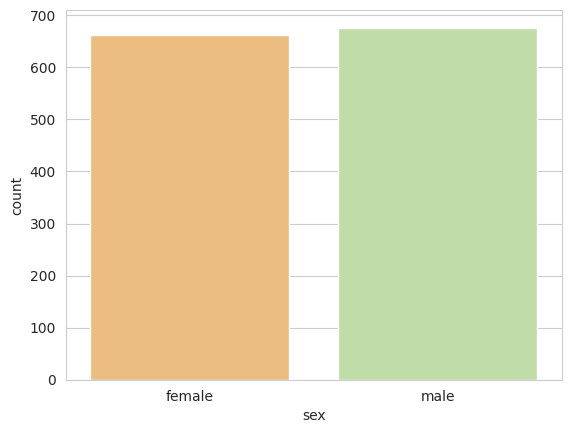

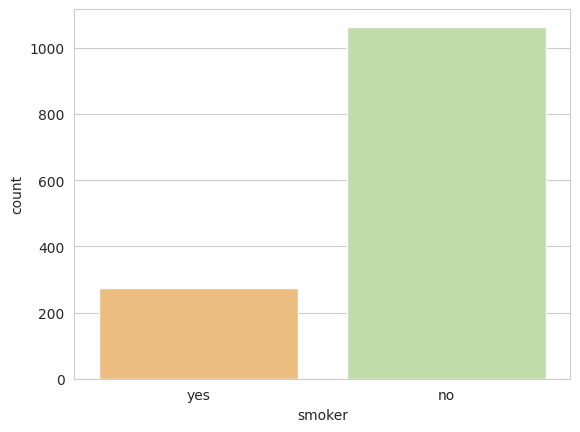

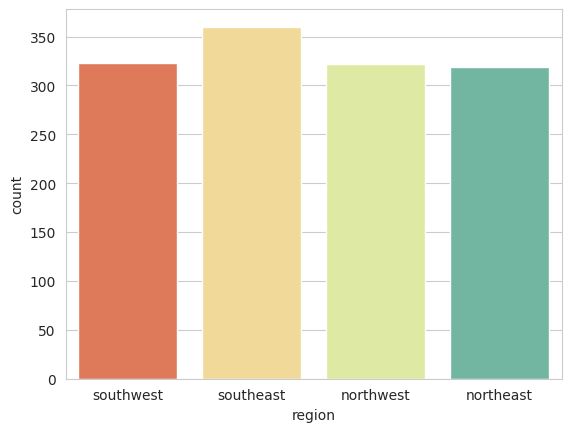

In [ ]:
for i in cat:
  sns.countplot(x = data1[i], palette = "Spectral")
  plt.show()

*Display and remove the duplicate rows in the Dataframe. Duplicate rows increase the computational time of the Machine Learning model and also result in falsely positive results.*

In [ ]:
data1[data1.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0.0,no,northwest,1639.5631


In [ ]:
data1.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
data1[data1.duplicated()]

,age,sex,bmi,children,smoker,region,charges


***Data Preprocessing Stage:***

*1. Split the data into train and test. This is necessary in order to check how well the model is performing before shipping the model into production. Also any kind of preprocessing needs to be done after splitting the data into train and test set.*

*2. Dealing with Missing values. This is another critical aspect of data preprocessing as Machine Learning models cannot deal with Missing values. So we have to either remove them or impute them.*

*3. Encode the categorical features as Machine Learning models cannot work with categorical data.*



In [ ]:
X = data1.drop(columns='charges', axis=1)
Y = data1['charges']

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0.0,yes,southwest
1,18,male,33.770,1.0,no,southeast
2,28,male,33.000,3.0,no,southeast
3,33,male,22.705,0.0,no,northwest
4,32,male,28.880,0.0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest
1334,18,female,31.920,0.0,no,northeast
1335,18,female,36.850,0.0,no,southeast
1336,21,female,25.800,0.0,no,southwest


In [ ]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y,test_size=0.20, random_state = 71)

*Separatin numerical and categorical features from train and test set as both will require separate treatment.*

In [ ]:
train_num = train_X.select_dtypes(include = 'number')
train_cat = train_X.select_dtypes(include = 'object')

test_num = test_X.select_dtypes(include = 'number')
test_cat = test_X.select_dtypes(include = 'object')

*Missing value imputation. We can also remove the missing values but then it would lead to data loss. So we will impute them using mean, median or mode. For numerical features we can use mean or median and for categorical features we will use mode*

In [ ]:
print('Missing values before imputation \n', train_cat.isnull().sum())
train_cat.fillna(train_cat.mode().loc[0], inplace = True)
print('\n')
print('Missing values after imputation \n', train_cat.isnull().sum())

Missing values before imputation 
 sex        0
smoker     0
region    12
dtype: int64


Missing values after imputation 
 sex       0
smoker    0
region    0
dtype: int64


In [ ]:
print('Missing values before imputation \n', train_num.isnull().sum())
train_num.fillna(train_num.median(), inplace = True)
print('\n')
print('Missing values after imputation \n', train_num.isnull().sum())

Missing values before imputation 
 age          0
bmi         17
children    15
dtype: int64


Missing values after imputation 
 age         0
bmi         0
children    0
dtype: int64


In [ ]:
print('Missing values before imputation \n', test_cat.isnull().sum())
test_cat.fillna(train_cat.mode().loc[0], inplace = True)
print('\n')
print('Missing values after imputation \n', test_cat.isnull().sum())

Missing values before imputation 
 sex       0
smoker    0
region    2
dtype: int64


Missing values after imputation 
 sex       0
smoker    0
region    0
dtype: int64


In [ ]:
print('Missing values before imputation \n', test_num.isnull().sum())
test_num.fillna(train_num.median(), inplace = True)
print('\n')
print('Missing values after imputation \n', test_num.isnull().sum())

Missing values before imputation 
 age         0
bmi         3
children    4
dtype: int64


Missing values after imputation 
 age         0
bmi         0
children    0
dtype: int64


*Encoding the categorical features. Machines cannot work with charatcers/text. They can only understand numbers and digits*.



In [ ]:
train_cat.replace({'sex':{'male':0,'female':1}}, inplace=True)

train_cat.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

train_cat.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [ ]:
test_cat.replace({'sex':{'male':0,'female':1}}, inplace=True)

test_cat.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

test_cat.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

*Reset the index of the train and test set in order to avoid noisy null values.*

In [ ]:
train_num.reset_index(inplace = True, drop = True)
train_cat.reset_index(inplace = True, drop = True)
test_num.reset_index(inplace = True, drop = True)
test_cat.reset_index(inplace = True, drop = True)

*Concatenating the numerical and categorical dataframes together.*

In [ ]:
train_x1 = pd.concat([train_num, train_cat], axis = 1)
test_x1 = pd.concat([test_num, test_cat], axis = 1) 

*Train our Machine Learning models.Using 5 different models (linear, tree, forest, distance and boosting based models) in order to see which performs the best.*

In [ ]:
!pip install xgboost
import xgboost as xgb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

model1 = LinearRegression()
model2 = DecisionTreeRegressor(random_state = 71)
model3 = RandomForestRegressor(random_state = 71)
model4 = KNeighborsRegressor()
model5 = xgb.XGBRegressor()
model6 = SVR()

*Fitting the Linear Regression model.*

In [ ]:
model1.fit(train_x1, train_Y)

LinearRegression()

*Predicting on the test set using the Linear Regression model.*

In [ ]:
pred1 = model1.predict(test_x1)

*Calculating the error for the Linear Regression model.*

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae1 = mean_absolute_error(test_Y, pred1)

In [ ]:
mae1

4089.441848654363

*DecisionTreeRegressor*

In [ ]:
model2.fit(train_x1, train_Y)
pred2 = model2.predict(test_x1)

mae2 = mean_absolute_error(test_Y, pred2)

mae2

3105.5832093656713

*RandomForestRegressor*

In [ ]:
model3.fit(train_x1, train_Y)
pred3 = model3.predict(test_x1)

mae3 = mean_absolute_error(test_Y, pred3)

mae3

2614.144493591082

*KNeighborsRegressor*

In [ ]:
model4.fit(train_x1, train_Y)
pred4 = model4.predict(test_x1)

mae4 = mean_absolute_error(test_Y, pred4)

mae4

7957.235197260447

*XGBRegressor*

In [ ]:
model5.fit(train_x1, train_Y)
pred5 = model5.predict(test_x1)

mae5 = mean_absolute_error(test_Y, pred5)

mae5

2858.07449021324

*svm*

In [ ]:
model6.fit(train_x1, train_Y)
pred6 = model5.predict(test_x1)

mae6 = mean_absolute_error(test_Y, pred5)

mae6

2858.07449021324

*Found that model3(RandomForestRegressor) gave the lowest mean_absolute_error.*

*Building a Predictive System*

In [ ]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model3.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is ', prediction[0])

[7409.5640358]
The insurance cost is  7409.564035799995
